In [1]:
from synet.process.disease import simulate_disease, simulate_disease_start
from synet.generators import create_temporal_network

from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

In [2]:
all_p_intern = [0, 0.5, 0.9, 0.99, 1]
all_p_infected = [0.02, 0.028, 0.03, 0.033, 0.035, 0.037, 0.04, 0.05]
all_agents = [20, 40, 80, 160, 320]

n_events=100000
n_sample = 100
n_agents = 40

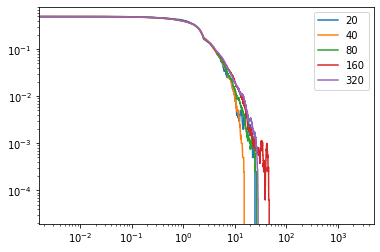

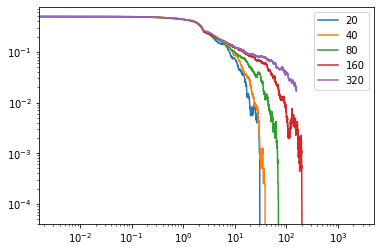

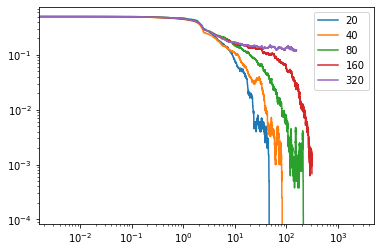

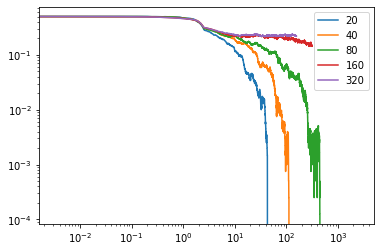

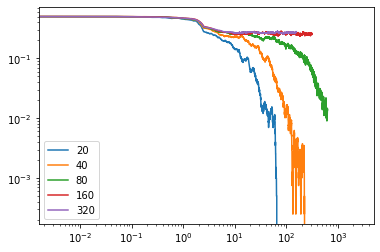

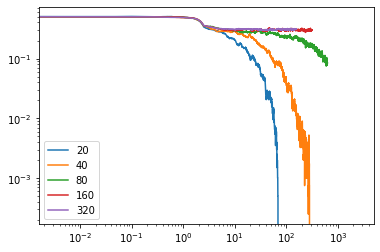

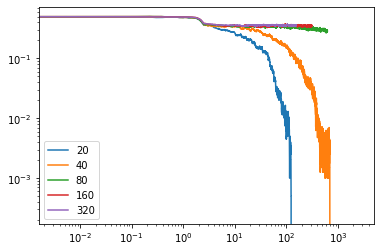

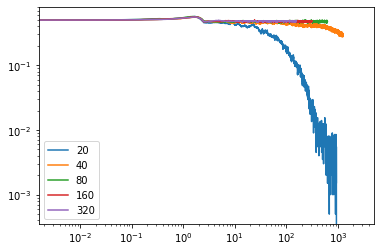

In [3]:
for p_infected in all_p_infected:
    cur_int = []
    for n_agents in all_agents:
        A, event_list, participants = create_temporal_network(n_events=n_events, p_intern=0,
                                                              part_per_community=n_agents//2)
        cur_results = np.zeros(n_events//2)

        for _ in range(n_sample):
            start = 1+np.random.randint(n_events//2-1)
            end = start + n_events//2
            cur_results += simulate_disease(participants, start, end, n_agents=n_agents, p_infected=p_infected)

        cur_results /= n_sample*n_agents
        cur_int.append(np.sum(cur_results))
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(np.arange(len(cur_results))/n_agents, cur_results, label=n_agents)

    plt.legend()
    plt.show()

In [4]:
all_results = defaultdict(lambda: {})
for p_intern in all_p_intern:
    A, event_list, participants = create_temporal_network(n_events=n_events, p_intern=p_intern,
                                                          part_per_community=n_agents//2)
    for p_infected in all_p_infected:
        cur_results = np.zeros(n_events//2)
        for _ in range(n_sample):
            start = 1+np.random.randint(n_events//2-1)
            end = start + n_events//2
            cur_results += simulate_disease(participants, start, end, n_agents=n_agents, p_infected=p_infected)
        all_results[p_intern][p_infected] = cur_results/n_sample


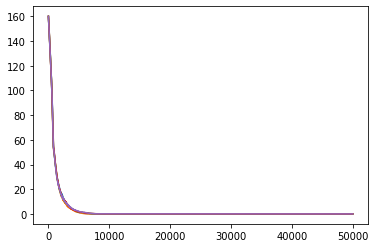

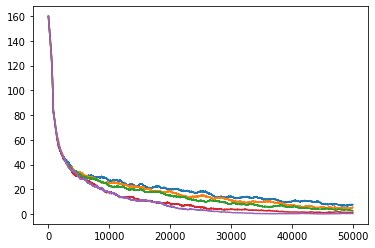

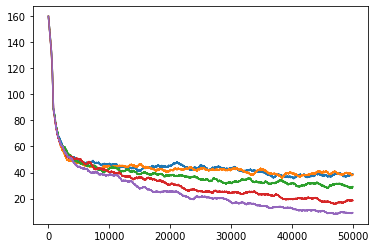

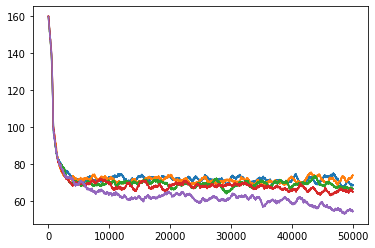

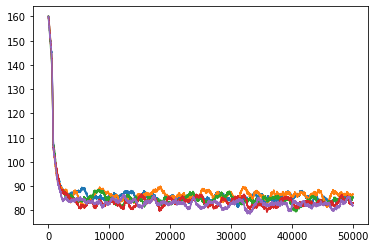

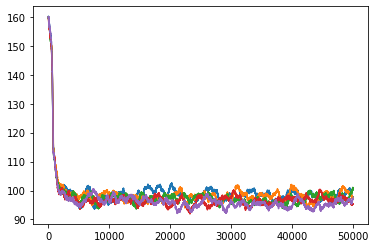

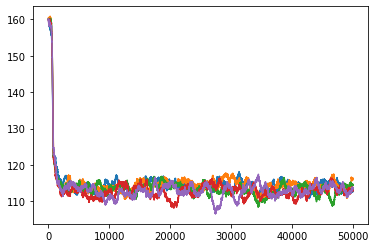

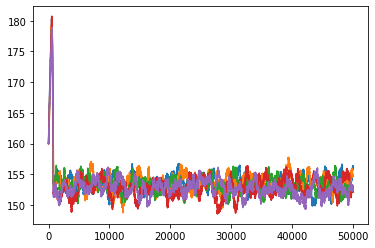

In [5]:
for p_infected in all_p_infected:
    for p_intern in all_p_intern:
        plt.plot(all_results[p_intern][p_infected])
    plt.show()

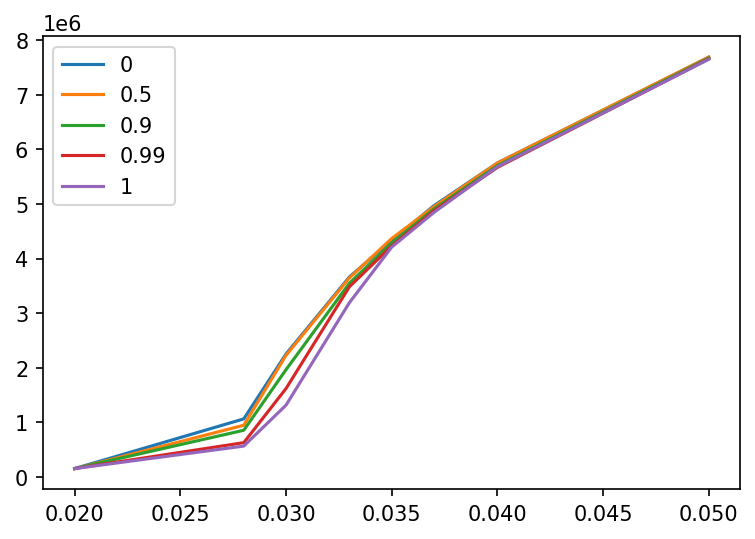

In [6]:
new_res = {}
plt.figure(dpi=150)
for p_intern, cur_results in all_results.items():
    cur_int = []
    for p_infection, res in cur_results.items():
        cur_int.append(np.sum(res))
    new_res[p_intern] = np.array(cur_int)

for key, res in new_res.items():
    plt.plot(all_p_infected, res, label=key)
plt.legend()
plt.show()
